
# MScFE WQU 610 Econometrics: Group Submission Project 2
### (22/03) Econometrics (C22-S1) Group 40
### Group Members:
### Sabuni Emmanuel
### Neil Shah
## Context: Assume you are an Alternative Investments (gold and/or bitcoin) Portfolio Manager. Then the world was impacted by a pandemic. Compare 3 asset classes during COVID-19.



# 0. Data Selecting

Recall some data we have used in submission 1.

For gold ETF, we choose Aberdeen Standard Gold ETF Trust (SGOL).

For equity ETF outside US, we choose JPMorgan BetaBuilders Canada ETF (BBCA).

For bitcoin, we choose Grayscale Bitcoin Trust, with symbol GBTC



All prices are in USD
Data source: https://finance.yahoo.com

# 1. Data Importing

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arch
from statsmodels.tsa.stattools import kpss, coint
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.api import VAR
%matplotlib inline

**Import closing prices for the year of 2020 (April - Dec) for your gold ETF, your equity ETF, and bitcoin.**

Notice : We have used yfinance package function to download the stocks directly from yahoo finace instead of downloading csv files and importing them into jupiter notebook like we did with submission 1. this is more quicker and easier

In [2]:
gold_df = yf.download("SGOL", start="2020-4-1", end="2020-12-31")
equity_df = yf.download("BBCA", start="2020-4-1", end="2020-12-31")
bitcoin_df= yf.download("GBTC", start="2020-4-1", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Available data for gold

In [3]:
gold_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,15.60,15.60,15.15,15.150000,15.150000,1483900
2020-04-01,15.17,15.35,15.13,15.310000,15.310000,1552200
2020-04-02,15.50,15.60,15.43,15.550000,15.550000,1117300
2020-04-03,15.59,15.66,15.50,15.630000,15.630000,1321900
2020-04-06,15.83,16.08,15.75,16.059999,16.059999,2101700


In [4]:
gold_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,17.959999,18.049999,17.940001,18.010000,18.010000,1089500
2020-12-24,18.000000,18.080000,17.990000,18.070000,18.070000,703800
2020-12-28,18.160000,18.230000,18.000000,18.010000,18.010000,1262100
2020-12-29,18.059999,18.129999,18.000000,18.059999,18.059999,2295800
2020-12-30,18.090000,18.209999,18.080000,18.200001,18.200001,1808500


Available data Equity (BBCA)

In [5]:
equity_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,36.900002,38.299999,36.740002,38.020000,36.257488,189550
2020-04-01,36.720001,37.020000,36.040001,36.119999,34.445572,119400
2020-04-02,36.400002,37.500000,36.279999,36.860001,35.151272,108750
2020-04-03,36.740002,37.080002,36.119999,36.380001,34.693523,78200
2020-04-06,37.880001,38.439999,37.700001,38.439999,36.658024,101200


In [6]:
equity_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,53.880001,53.980000,53.680000,53.700001,52.326035,121500
2020-12-24,53.740002,54.119999,53.740002,54.119999,52.735287,97650
2020-12-28,54.419998,54.680000,53.619999,53.740002,52.365017,115350
2020-12-29,54.060001,54.160000,53.660000,53.820000,52.442966,74800
2020-12-30,53.799999,54.220001,53.799999,54.020000,52.637852,110450


Available data for bitcoin

In [7]:
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,7.070,7.14,6.94,7.120,7.120,2675500
2020-04-01,6.800,6.90,6.41,6.495,6.495,4274800
2020-04-02,7.000,7.87,6.98,7.720,7.720,7980600
2020-04-03,7.940,7.94,7.25,7.480,7.480,3059800
2020-04-06,7.824,8.06,7.71,7.950,7.950,4910400


In [8]:
bitcoin_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,30.500000,30.850000,28.820000,28.879999,28.879999,11054700
2020-12-24,28.700001,28.709999,26.450001,27.350000,27.350000,12591200
2020-12-28,33.330002,33.340000,30.120001,30.450001,30.450001,19499400
2020-12-29,31.110001,31.150000,28.500000,30.080000,30.080000,16651800
2020-12-30,31.299999,33.000000,31.000000,32.900002,32.900002,18116500


# 2. Data Processing


We use adjusted close prices to calculate the daily returns. Adjusted close prices are the prices that already take into account stock split and dividends, which reflex more accurate the change of the prices.

In [9]:
gold_df["Daily Return"] = gold_df["Adj Close"].pct_change(1)
gold_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-31,15.60,15.60,15.15,15.150000,15.150000,1483900,NaN
2020-04-01,15.17,15.35,15.13,15.310000,15.310000,1552200,0.010561
2020-04-02,15.50,15.60,15.43,15.550000,15.550000,1117300,0.015676
2020-04-03,15.59,15.66,15.50,15.630000,15.630000,1321900,0.005145
2020-04-06,15.83,16.08,15.75,16.059999,16.059999,2101700,0.027511


In [10]:
equity_df["Daily Return"] = equity_df["Adj Close"].pct_change(1)
equity_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-31,36.900002,38.299999,36.740002,38.020000,36.257488,189550,NaN
2020-04-01,36.720001,37.020000,36.040001,36.119999,34.445572,119400,-0.049974
2020-04-02,36.400002,37.500000,36.279999,36.860001,35.151272,108750,0.020487
2020-04-03,36.740002,37.080002,36.119999,36.380001,34.693523,78200,-0.013022
2020-04-06,37.880001,38.439999,37.700001,38.439999,36.658024,101200,0.056624


In [11]:
bitcoin_df["Daily Return"] = bitcoin_df["Adj Close"].pct_change(1)
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-31,7.070,7.14,6.94,7.120,7.120,2675500,NaN
2020-04-01,6.800,6.90,6.41,6.495,6.495,4274800,-0.087781
2020-04-02,7.000,7.87,6.98,7.720,7.720,7980600,0.188607
2020-04-03,7.940,7.94,7.25,7.480,7.480,3059800,-0.031088
2020-04-06,7.824,8.06,7.71,7.950,7.950,4910400,0.062834


# 3. Data summaries

The Stock Summary provides information on stock groups and shows the quantity details, rate and closing value of the stock items under the stocks provided.

We computed a 20-day moving average price of gold ETF (SGOL), Equity ETF (BBCA) and Bitcoin as well.  The moving average price on 1 April 2020 includes data from March. 

In [12]:
### Defining a function which will help us to summarize the data
def summary(df):
    data_given = get_data(df, 3, 12, "Adj Close")
    moving_average = data_given.rolling(20, min_periods=1).mean() #20 days before
    return get_data(moving_average, 4, 12)

### Definition of function getting the data
df_names_To_be_used = {0: "gold.df", 1: "equity.df", 2: "bitcoin.df"}
dfs = [gold_df, equity_df, bitcoin_df]
def get_data(df, month_start, month_end, column=None):
    data_given = df[(df.index >= f"2020-{month_start:02d}-01") & (df.index < f"2020-{month_end:02d}-01")]
    if column: 
        data_given = data_given[column]
    return data_given

******************************************************************************************
******************************************************************************************
Moving average for gold.df from April to December
__________________________________________________


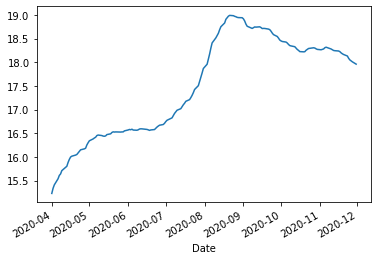

Date
2020-04-01    15.230000
2020-04-02    15.336667
2020-04-03    15.410000
2020-04-06    15.540000
2020-04-07    15.610000
Name: Adj Close, dtype: float64
Date
2020-11-23    18.1330
2020-11-24    18.0840
2020-11-25    18.0500
2020-11-27    18.0100
2020-11-30    17.9615
Name: Adj Close, dtype: float64
******************************************************************************************
******************************************************************************************
Moving average for equity.df from April to December
__________________________________________________


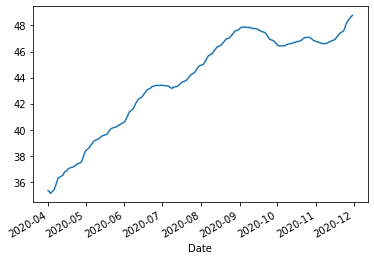

Date
2020-04-01    35.351530
2020-04-02    35.284777
2020-04-03    35.136964
2020-04-06    35.441176
2020-04-07    35.710740
Name: Adj Close, dtype: float64
Date
2020-11-23    47.575098
2020-11-24    47.806073
2020-11-25    48.124993
2020-11-27    48.450678
2020-11-30    48.764765
Name: Adj Close, dtype: float64
******************************************************************************************
******************************************************************************************
Moving average for bitcoin.df from April to December
__________________________________________________


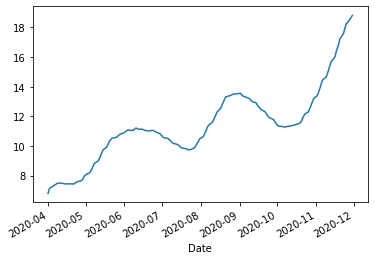

Date
2020-04-01    6.807500
2020-04-02    7.111667
2020-04-03    7.203750
2020-04-06    7.353000
2020-04-07    7.404167
Name: Adj Close, dtype: float64
Date
2020-11-23    17.61425
2020-11-24    17.94875
2020-11-25    18.24650
2020-11-27    18.42525
2020-11-30    18.81595
Name: Adj Close, dtype: float64


In [13]:
moving_averages = []
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90)
    print("\033[1m" + f"Moving average for {df_names_To_be_used [index]} from April to December")
    print("_" * 50)
    data_given = summary(df)
    data_given.plot()
    plt.show()
    print(data_given.head())
    print(data_given.tail())
    moving_averages.append(data_given)

# 4. Graphing

The task here involves:

Graphing each price series along with its moving average from April 2020 through Dec 2020.

Commenting on how the price series and average series intersect or not.

Graphing gold and equity prices on the same plot.  Using a separate scale for each series, and be sure to add a label and legend

Graphing gold and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

Graphing equity and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend


******************************************************************************************
******************************************************************************************
Available prices and the moving average for gold.df from April to December
___________________________________________________________________________


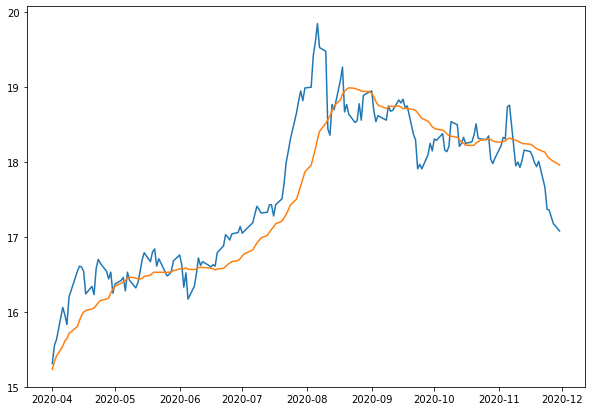

******************************************************************************************
******************************************************************************************
Available prices and the moving average for equity.df from April to December
___________________________________________________________________________


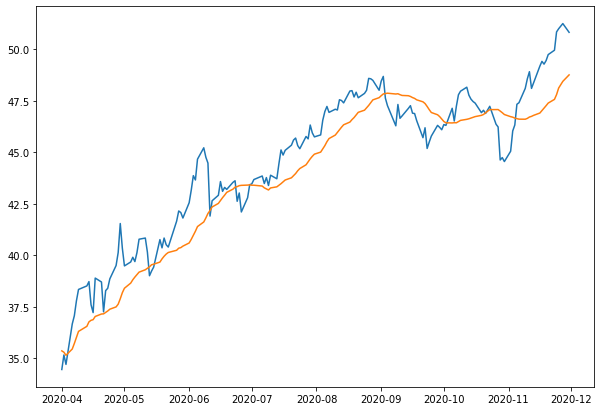

******************************************************************************************
******************************************************************************************
Available prices and the moving average for bitcoin.df from April to December
___________________________________________________________________________


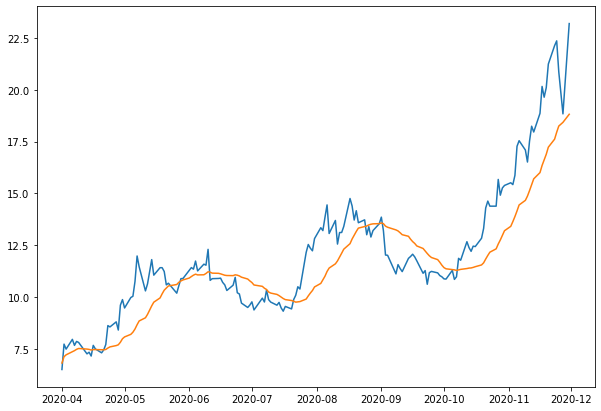

In [14]:
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90)
    print("\033[1m"+f"Available prices and the moving average for {df_names_To_be_used [index]} from April to December")
    print("_" * 75)
    data = get_data(df, 4, 12, "Adj Close")
    moving_average = moving_averages[index]
    plt.figure(figsize=(10,7))
    plt.plot(data)
    plt.plot(moving_average)
    plt.show()

Labelling and legend

******************************************************************************************
******************************************************************************************
The prices of gold.df and equity.df from April to December
____________________________________________________________


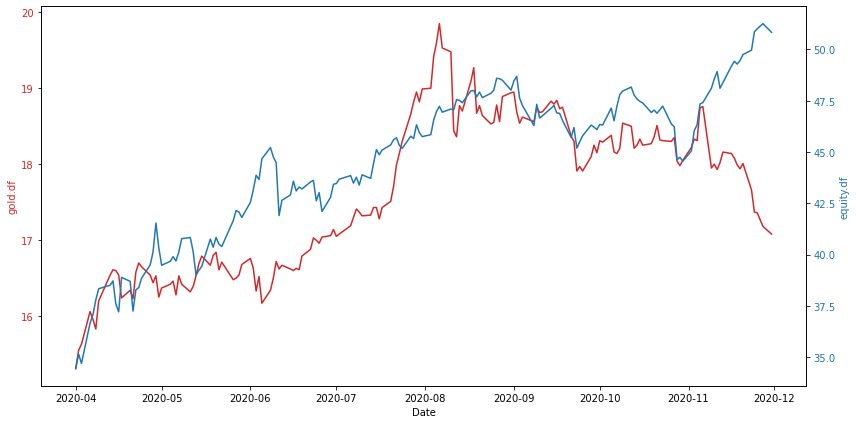

******************************************************************************************
******************************************************************************************
The prices of gold.df and bitcoin.df from April to December
____________________________________________________________


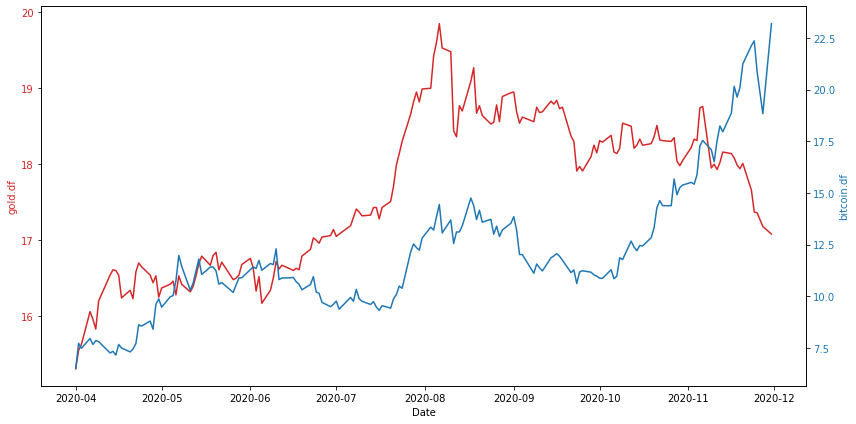

******************************************************************************************
******************************************************************************************
The prices of equity.df and bitcoin.df from April to December
____________________________________________________________


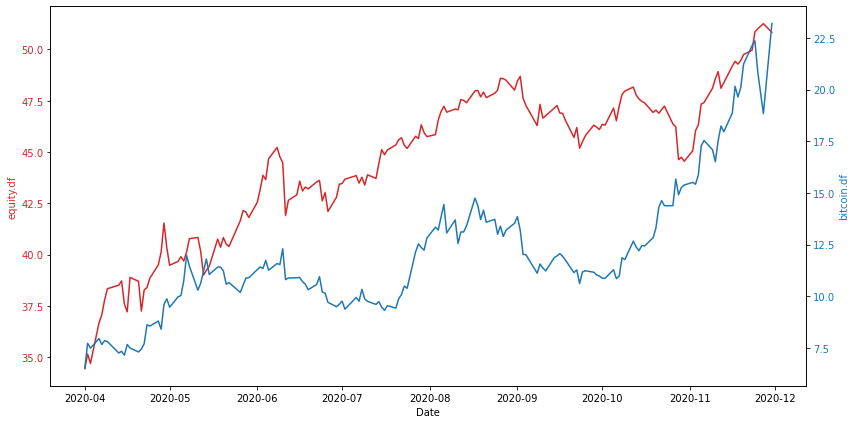

In [15]:
for a, b in [(0, 1), (0, 2), (1, 2)]:
    print("*" * 90)
    print("*" * 90)
    print("\033[1m" + f"The prices of {df_names_To_be_used[a]} and {df_names_To_be_used[b]} from April to December")
    print("_" * 60)
    y1_data = get_data(dfs[a], 4, 12, "Adj Close")
    y2_data = get_data(dfs[b], 4, 12, "Adj Close")
    fig, y1_axis = plt.subplots(figsize=(12,6))

    y1_color = 'tab:red'
    y2_color = 'tab:blue'

    y1_axis.set_xlabel('Date')
    y1_axis.set_ylabel(df_names_To_be_used[a], color=y1_color)
    y1_axis.plot( y1_data, color=y1_color)
    y1_axis.tick_params(axis='y', labelcolor=y1_color)
    y2_axis = y1_axis.twinx() 


    y2_axis.set_ylabel(df_names_To_be_used[b], color=y2_color)  
    y2_axis.plot( y2_data, color=y2_color)
    y2_axis.tick_params(axis='y', labelcolor=y2_color)

    fig.tight_layout()  
    plt.show()

# 5. Fitting a GARCH Model

**The function defination to get a partcular data set

In [16]:
def get_data(df, month_start, month_end, column):
    return df[(df.index >= f"2020-{month_start:02d}-01") & (df.index < f"2020-{month_end:02d}-01")][column]





**In stock markets, the return of a security may depend on its volatility (risk). To model such phenomena, the GARCH-in-mean (GARCH-M) model adds a heteroskedasticity term into the mean equation.

**GARCH-M(p,q) model with normal-distributed innovation has p+q+3 estimated parameters

In [17]:

def fit_garch(data, garch_type="GARCH"):
    if garch_type == "TARCH":
        garch = arch.arch_model(data, vol='GARCH', p=1, o=1, q=1, power=1)
    else:
        garch = arch.arch_model(data, vol=garch_type, p=1, o=0, q=1)
    garch_fitted = garch.fit()
    print(garch_fitted.summary())
    if garch_type != "FIGARCH":
        omega = garch_fitted.params["omega"]
        alpha = garch_fitted.params["alpha[1]"]
        beta = garch_fitted.params["beta[1]"]
        print(f"Unconditional variance: {omega/(1 - alpha - beta)}")

Each model will return the particular long term variances.

We have implemented the **Constant mean for each GARCH model, { TARCH,FIGARCH, EGARCH and GARCH altogether}**

At the end of each execution, we can see the  3 long-term variances indicated by the models. 

# GARCH Models for Q2 {April-June}

In [18]:
for model in ["GARCH", "EGARCH", "FIGARCH", "TARCH"]:
    index = 1 ## Index 0 :: gold.df. index 1:: equity.df, and index 2: btc.df
    df = dfs[index]
    print("*" * 90)
    print("*" * 90) 
    print(f"{model} model for {df_names_To_be_used[index]} from April to June")
    print("_" *47)
    data = get_data(df, 4, 6, "Daily Return")
    data = data.dropna()
    fit_garch(data, model)

******************************************************************************************
******************************************************************************************
GARCH model for equity.df from April to June
_______________________________________________
Iteration:      1,   Func. Count:      5,   Neg. LLF: -99.9049868423905
Optimization terminated successfully    (Exit mode 0)
            Current function value: -99.90498741132305
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Daily Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                99.9050
Distribution:                  Normal   AIC:                          -191.810
Method:            Maximum Likelihood   BIC:       

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004661. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004661. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univ

# GARCH Models for Q3 {July-Sept}

In [19]:
for model in ["GARCH", "EGARCH", "FIGARCH", "TARCH"]:
    index = 1 ## Index 0 :: gold.df. index 1:: equity.df, and index 2: btc.df
    df = dfs[index]
    print("*" * 90)
    print("*" * 90) 
    print(f"{model} model for {df_names_To_be_used[index]} from July to september")
    print("_" *47)
    data = get_data(df, 7, 9, "Daily Return")
    data = data.dropna()
    fit_garch(data, model)

******************************************************************************************
******************************************************************************************
GARCH model for equity.df from July to september
_______________________________________________
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1313.8033739799023
Iteration:      2,   Func. Count:     16,   Neg. LLF: -119.92644601959917
Iteration:      3,   Func. Count:     24,   Neg. LLF: -145.17572760532488
Iteration:      4,   Func. Count:     32,   Neg. LLF: -149.83120692239112
Iteration:      5,   Func. Count:     38,   Neg. LLF: -149.8337032283219
Iteration:      6,   Func. Count:     44,   Neg. LLF: -149.8405806732462
Iteration:      7,   Func. Count:     49,   Neg. LLF: -149.84235007911053
Iteration:      8,   Func. Count:     54,   Neg. LLF: -149.84252844036234
Iteration:      9,   Func. Count:     59,   Neg. LLF: -149.84255356343058
Iteration:     10,   Func. Count:     64,   Neg. LLF: -149

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.505e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.505e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univ

# GARCH Models for Q4 {Oct-Dec}

In [20]:
for model in ["GARCH", "EGARCH", "FIGARCH", "TARCH"]:
    index = 1 ## Index 0 :: gold.df. index 1:: equity.df, and index 2: btc.df
    df = dfs[index]
    print("*" * 90)
    print("*" * 90) 
    print(f"{model} model for {df_names_To_be_used[index]} from October to December")
    print("_" *47)
    data = get_data(df, 10, 12, "Daily Return")
    data = data.dropna()
    fit_garch(data, model)

******************************************************************************************
******************************************************************************************
GARCH model for equity.df from October to December
_______________________________________________
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4445.521779106413
Iteration:      2,   Func. Count:     16,   Neg. LLF: -41.69281344503365
Iteration:      3,   Func. Count:     24,   Neg. LLF: -129.83308791503
Iteration:      4,   Func. Count:     29,   Neg. LLF: -129.7913173665009
Iteration:      5,   Func. Count:     35,   Neg. LLF: -127.56649187833767
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1543375.49578767
Iteration:      7,   Func. Count:     54,   Neg. LLF: -95.79906865357637
Optimization terminated successfully    (Exit mode 0)
            Current function value: -129.8381311830047
            Iterations: 8
            Function evaluations: 59
            Gradient evaluations: 7
    

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001209. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001209. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\arch\univ

# 6. Assessing the stationality using KPSS Test

Kwiatkowski-Phillips- Schmidt-Shin test (KPSS test)

KPSS test is a statistical test to check for stationarity of a series around a deterministic trend.

We used KPSS test for gold_df, for equity_df and for bitcoin_df

# Assessing the stationality for Q2 {April-June}

In [21]:
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90) 
    print(f"Test stationary for {df_names_To_be_used[index]} from April to June")
    print("_" *53)
    Tested_Data = get_data(df, 4, 6, "Daily Return").values
    result = kpss(Tested_Data)
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))

******************************************************************************************
******************************************************************************************
Test stationary for gold.df from April to June
_____________________________________________________
KPSS Statistic: 0.284518
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for equity.df from April to June
_____________________________________________________
KPSS Statistic: 0.050460
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for bitcoin.df from 

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Notice: If we do not reject the hypothesis when we apply an Kwiatkowski-Phillips-
Schmidt-Shin test to some data series:
    - We conclude that the process is not integrated and We reject the hypothesis of a unit root against an alternative of stationarity

# Assessing the stationality for Q3 {July-Sept}

In [22]:
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90) 
    print(f"Test stationary for {df_names_To_be_used[index]} from July to September")
    print("_" *53)
    Tested_Data = get_data(df, 7, 9, "Daily Return").values
    result = kpss(Tested_Data)
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))



******************************************************************************************
******************************************************************************************
Test stationary for gold.df from July to September
_____________________________________________________
KPSS Statistic: 0.128213
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for equity.df from July to September
_____________________________________________________
KPSS Statistic: 0.094812
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for bitcoin.

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Assessing the stationality for Q4 {Oct-Dec}

In [23]:
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90) 
    print(f"Test stationary for {df_names_To_be_used[index]} from October to December")
    print("_" *53)
    Tested_Data = get_data(df, 10, 12, "Daily Return").values
    result = kpss(Tested_Data)
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))

******************************************************************************************
******************************************************************************************
Test stationary for gold.df from October to December
_____________________________________________________
KPSS Statistic: 0.342777
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for equity.df from October to December
_____________________________________________________
KPSS Statistic: 0.148676
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for bitc

C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Admin\.conda\envs\Rbook\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# 7. Modeling Cointegration

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series



SGOL was used as Aberdeen Standard Gold ETF Trust (SGOL) ETF

BBCA was used as JPMorgan BetaBuilders Canada ETF

BTC was used as Grayscale Bitcoin Trust

# Cointegration of Q2 {April-June}

In [24]:
SGOL = get_data(gold_df, 4, 6, "Daily Return").values
BBCA = get_data(equity_df, 4, 6, "Daily Return").values
BTC = get_data(bitcoin_df, 4, 6, "Daily Return").values

Cointagration of Gold ETF with JPMorgan BetaBuilders Canada ETF (BBCA) and Bitcoin as arrays, Q2

In [25]:
coint(SGOL, np.array([BBCA, BTC]).T)

(-6.39578667957799,
 1.0823235343124874e-06,
 array([-4.67463073, -3.96108528, -3.60986125]))

Cointagration of BBCA ETF with SGOL and Bitcoin as arrays, Q2

In [26]:
coint(BBCA, np.array([SGOL, BTC]).T)

(-5.375491885245277,
 0.00015809339470694944,
 array([-4.67463073, -3.96108528, -3.60986125]))

Cointagration of BBCA ETF with SGOL and Bitcoin as arrays, Q2

In [27]:
coint(BTC, np.array([SGOL, BBCA]).T)

(-1.8393477574753052,
 0.797932415514662,
 array([-4.67463073, -3.96108528, -3.60986125]))

For p-value < 0.01 for all tests, we will conclude that there are cointegrating vectors.

# Cointegration of Q3 {July-Sept}

In [28]:
SGOL = get_data(gold_df, 7, 9, "Daily Return").values
BBCA = get_data(equity_df, 7, 9, "Daily Return").values
BTC = get_data(bitcoin_df, 7, 9, "Daily Return").values

Cointagration of Gold ETF (SGOL) with BBCA and Bitcoin as arrays, Q3

In [29]:
coint(SGOL, np.array([BBCA, BTC]).T)

(-6.876860951911669,
 7.602048895917391e-08,
 array([-4.6556178 , -3.95031996, -3.60224723]))

Cointagration of BBCA ETF with SGOL and Bitcoin as arrays, Q3

In [30]:
coint(BBCA, np.array([SGOL, BTC]).T)

(-6.252543736703938,
 2.3034630696757187e-06,
 array([-4.6556178 , -3.95031996, -3.60224723]))

Cointagration of BBCA ETF with SGOL and Bitcoin as arrays, Q3

In [31]:
coint(BTC, np.array([SGOL, BBCA]).T)

(-3.201886085919803,
 0.167912724819877,
 array([-4.6556178 , -3.95031996, -3.60224723]))

For p-value < 0.01 for all tests, we will conclude that there are cointegrating vectors.

# VEC model and forecast Q3

In [32]:
data = np.array([SGOL, BBCA, BTC]).T
model = VECM(data, coint_rank=1)
vecm_res = model.fit()
vecm_res.gamma.round(4)
vecm_res.summary()
forecast, lower, upper = vecm_res.predict(5, 0.05)
print("\033[1m""LOWER BOUNDS OF CONFIDENCE INTERVALs:")
print("-"*40)
print(lower.round(3))
print("\n POINT FORECASTS")
print("-"*40)
print(forecast.round(3))
print("\n UPPER BOUNDS OF CONFIDENCE INTERVALS:")
print("-"*40)
print(upper.round(3))

LOWER BOUNDS OF CONFIDENCE INTERVALs:
----------------------------------------
[[-0.019 -0.022 -0.067]
 [-0.026 -0.027 -0.089]
 [-0.031 -0.03  -0.097]
 [-0.036 -0.034 -0.112]
 [-0.039 -0.035 -0.12 ]]

 POINT FORECASTS
----------------------------------------
[[ 0.011 -0.005  0.034]
 [ 0.008 -0.007  0.014]
 [ 0.01  -0.006  0.029]
 [ 0.009 -0.007  0.021]
 [ 0.009 -0.006  0.025]]

 UPPER BOUNDS OF CONFIDENCE INTERVALS:
----------------------------------------
[[0.042 0.012 0.135]
 [0.043 0.012 0.118]
 [0.05  0.018 0.156]
 [0.053 0.019 0.155]
 [0.058 0.023 0.171]]


Ploting the forecasts of VECM

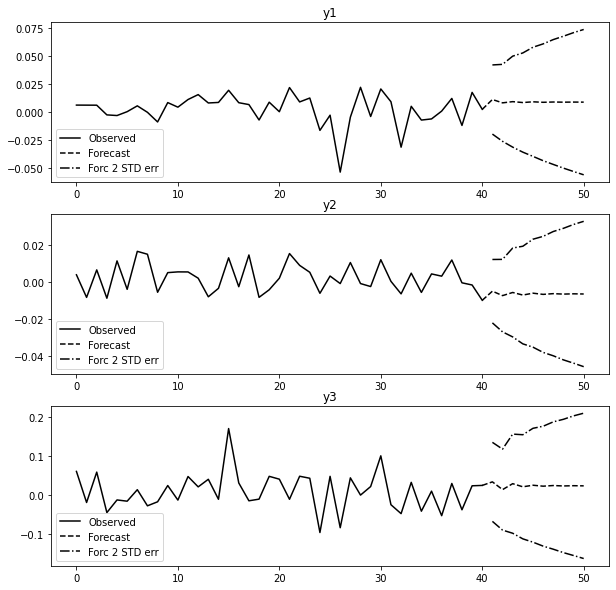

In [33]:
vecm_res.plot_forecast(10)

# VAR model and forecasts Q4

VAR model describe the dynamic interrelationship among stationary variables

In [39]:
data_use = np.array([SGOL, BBCA, BTC]).T ## y1, y2 and y3 corresponds to SPDR, iShares, BTC

#Fitting VAR model
results = model.fit()
results.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.y1,-0.3184,0.209,-1.521,0.128,-0.729,0.092
L1.y2,-0.0357,0.261,-0.137,0.891,-0.548,0.476
L1.y3,-0.0817,0.069,-1.183,0.237,-0.217,0.054
,coef,std err,z,P>|z|,[0.025,0.975]
L1.y1,0.0047,0.117,0.040,0.968,-0.224,0.234
L1.y2,-0.4326,0.146,-2.967,0.003,-0.718,-0.147
L1.y3,-0.0660,0.039,-1.713,0.087,-0.141,0.009
,coef,std err,z,P>|z|,[0.025,0.975]
L1.y1,-1.6136,0.686,-2.352,0.019,-2.958,-0.269
L1.y2,-0.2334,0.856,-0.273,0.785,-1.911,1.445


Fitting the results of Autocorrelation of VAR

In [46]:
results.acorr()

array([[[ 1.        ,  0.43105874,  0.68231971],
        [ 0.43105874,  1.        ,  0.47745667],
        [ 0.68231971,  0.47745667,  1.        ]],

       [[-0.24229286, -0.11622629, -0.11636262],
        [-0.4420355 , -0.28567917, -0.31995312],
        [-0.32725411, -0.39782995, -0.35639064]],

       [[ 0.15445735,  0.10350616,  0.18253882],
        [ 0.33010619, -0.01600273,  0.31840763],
        [ 0.38452653,  0.07524777,  0.27489791]],

       [[ 0.00655569, -0.22071098, -0.10131992],
        [-0.28803577, -0.35375698, -0.38030839],
        [-0.1695321 , -0.23444371, -0.14578741]],

       [[-0.12012772,  0.19342207,  0.02479231],
        [-0.01863285,  0.1279132 ,  0.0747362 ],
        [ 0.09342296,  0.2749141 ,  0.19380534]],

       [[-0.37421934, -0.38014125, -0.32825867],
        [-0.0279479 ,  0.01032972, -0.13043628],
        [-0.21163216, -0.15581263, -0.20937992]],

       [[ 0.55595012,  0.34589015,  0.31973511],
        [ 0.30949516,  0.34020416,  0.33317203],
        

In [47]:
data_use = np.array([SGOL, BBCA, BTC]).T
model = VAR(data)
results = model.fit(8)
print("\033[1m""LOWER BOUNDS OF CONFIDENCE INTERVALs:")
print("-"*40)
print(lower.round(3))
print("\n POINT FORECASTS")
print("-"*40)
print(forecast.round(3))
print("\n UPPER BOUNDS OF CONFIDENCE INTERVALS:")
print("-"*40)
print(upper.round(3))

LOWER BOUNDS OF CONFIDENCE INTERVALs:
----------------------------------------
[[-0.019 -0.022 -0.067]
 [-0.026 -0.027 -0.089]
 [-0.031 -0.03  -0.097]
 [-0.036 -0.034 -0.112]
 [-0.039 -0.035 -0.12 ]]

 POINT FORECASTS
----------------------------------------
[[ 0.011 -0.005  0.034]
 [ 0.008 -0.007  0.014]
 [ 0.01  -0.006  0.029]
 [ 0.009 -0.007  0.021]
 [ 0.009 -0.006  0.025]]

 UPPER BOUNDS OF CONFIDENCE INTERVALS:
----------------------------------------
[[0.042 0.012 0.135]
 [0.043 0.012 0.118]
 [0.05  0.018 0.156]
 [0.053 0.019 0.155]
 [0.058 0.023 0.171]]


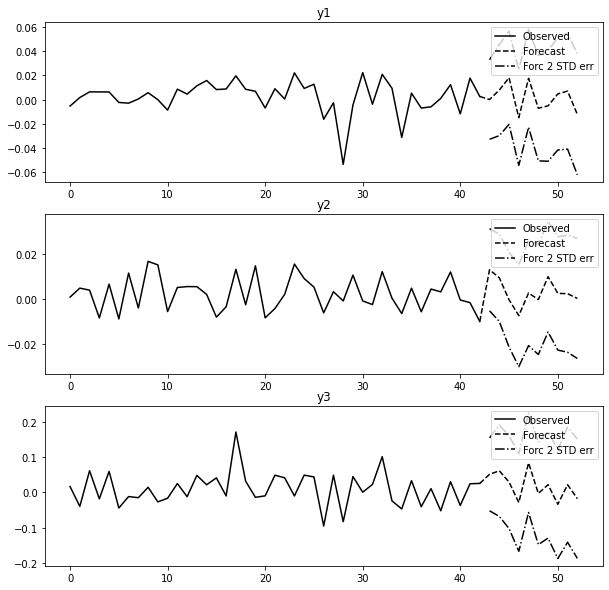

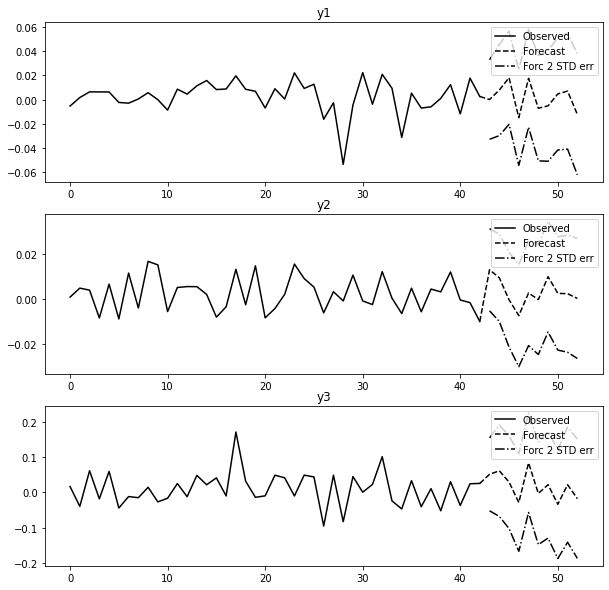

In [48]:
results.plot_forecast(10)

Impulse response of VAR

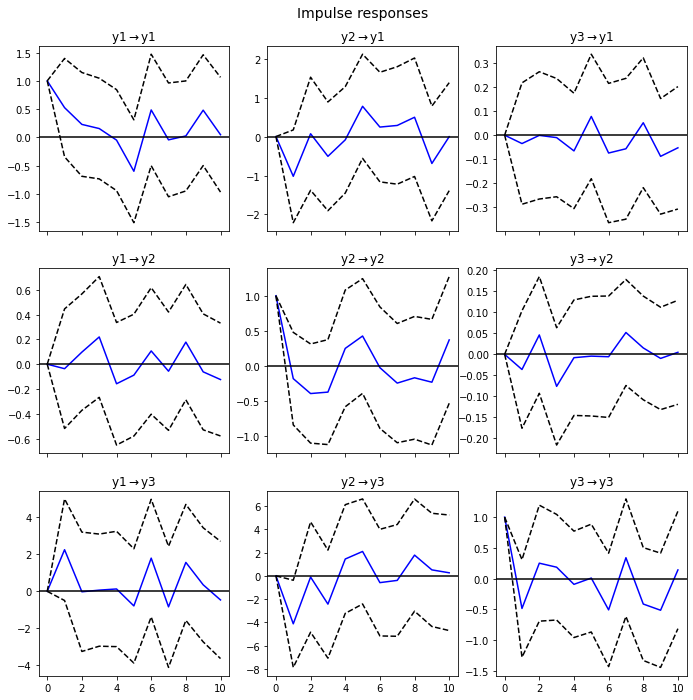

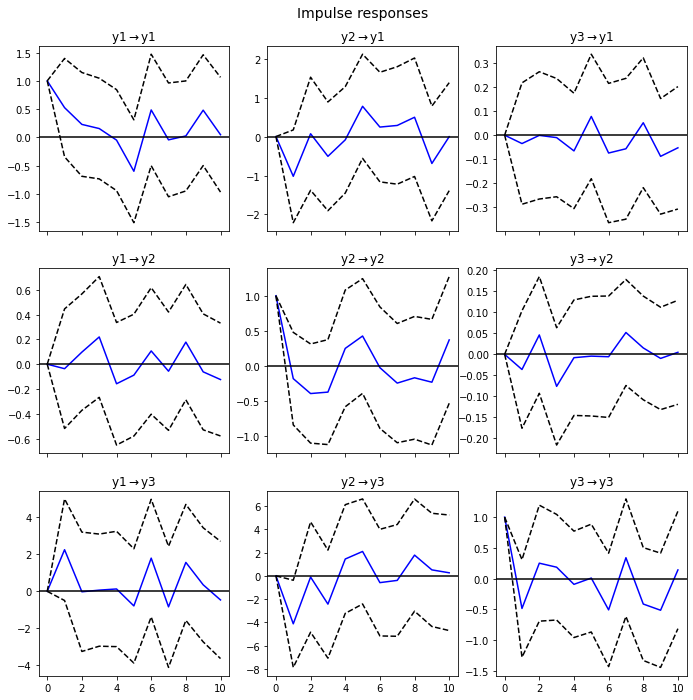

In [49]:
irf = results.irf(10)
irf.plot(orth=False)

# 8. Correlation vs Cointegration

# Does correlation have a direction?

Correlation is symmetric, meaning it does not have a direction. By definition, correlation shows an outlook to the statistical relations between many variables. A high correlation amongst two or more variables shows that one variable has a strong or significant relations to the others. Only the values to measure correlation is important, not the order of pair of variables to be measured, hence there is no direction for correlation.

# Does linear regression have a direction?

Linear regression does actually have a direction, meaning x regressed on y is usually different from y regressed on x. By definition, linear regression is used to determine the relationship between two variables by finding a linear equation that fits the available data the most. Linear equation implies that the variable to be used as explain data to fit the other data has a direction, in the other word, there is dependence between variables to be evaluated. 

# Does cointegration have a direction?

By definition, cointegration does not have a direction. It deals with the equilibrium relations between variables in the long-term time horizon. This can be achieved by running a OLS model, then obtain the residuals. If the residuals can pass the stationary tests, there might be a long-term relationship between variables. In the other words, cointegration shows the statistical properties of time series data over a long time. However, due to the way to estimate parameters and residuals, we can see cointegration has a directional effect on the method to perform analysis. Regressing x on y and regressing y on x can yield to different results for stationary tests.

##### Part 1-4 qwas done by Neil Shah and the remaining parts were done by Sabuni Emmanuel. The after we combined and edited corrected some errors together via github